In [1]:
import os
os.getcwd()

'C:\\Users\\Preksha\\Simplilearn\\Data Science with Python\\Project'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import pandas as pd
%matplotlib inline

# 1 Import a 311 NYC service request

In [3]:
dataset = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', parse_dates=["Created Date", "Closed Date"])

C:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
dataset

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:00,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:00,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:00,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:00,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:00,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,2015-03-29 00:33:00,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,2015-03-29 00:33:00,2015-03-29 02:33:00,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,2015-03-29 00:33:00,2015-03-29 03:40:00,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,2015-03-29 00:33:00,2015-03-29 04:38:00,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


In [5]:
dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [6]:
dataset.replace('Unspecified',np.NaN,inplace=True)

In [7]:
# Check for duplicates and NA values and resolving them

remove_columns= ['Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2','Intersection Street 1',
'Intersection Street 2','Address Type','Park Facility Name','Park Borough','School Name',
'School Number','School Region','School Code','School Phone Number','School Address','School City',
'School State','School Zip','School Not Found','School or Citywide Complaint','Vehicle Type',
'Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction',
'Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Landmark',
'X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date','Resolution Action Updated Date','Community Board','Facility Type',
'Location']

dataset.drop(remove_columns, inplace=True, axis=1)
dataset = dataset[dataset['Status']=='Closed']
dataset.drop(['Status'],inplace=True, axis=1)
dataset = dataset[(dataset['Latitude'].notnull())& (dataset['Longitude'].notnull()) & (dataset['Descriptor'].notnull())]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291204 entries, 0 to 300697
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Unique Key              291204 non-null  int64         
 1   Created Date            291204 non-null  datetime64[ns]
 2   Closed Date             291204 non-null  datetime64[ns]
 3   Agency                  291204 non-null  object        
 4   Complaint Type          291204 non-null  object        
 5   Descriptor              291204 non-null  object        
 6   Location Type           291149 non-null  object        
 7   Incident Zip            291164 non-null  float64       
 8   City                    291164 non-null  object        
 9   Resolution Description  291204 non-null  object        
 10  Borough                 291204 non-null  object        
 11  Latitude                291204 non-null  float64       
 12  Longitude               291204

C:\anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
# Making a uniform format for city names
def camel_case(city):
    try:
        city = city.split(' ')
        city = ' '.join([x.lower().capitalize() for x in city])
        if city == 'Unknown':
            return np.nan
        else:
            return city
    except:
        return np.nan
    
# Apply camel_case function to City column
dataset['City'] = dataset['City'].apply(camel_case)
dataset['City'].value_counts()

Brooklyn               96881
New York               61940
Bronx                  40223
Staten Island          12214
Jamaica                 7155
Astoria                 6970
Flushing                5919
Ridgewood               5124
Corona                  4266
Woodside                3614
South Richmond Hill     2759
East Elmhurst           2739
Ozone Park              2735
Elmhurst                2624
Long Island City        2543
Woodhaven               2449
Maspeth                 2445
South Ozone Park        2165
Fresh Meadows           1886
Richmond Hill           1865
Queens Village          1788
Middle Village          1759
Jackson Heights         1671
Forest Hills            1655
Rego Park               1477
College Point           1217
Bayside                 1215
Far Rockaway            1163
Whitestone              1093
Hollis                  1001
Howard Beach             923
Rosedale                 913
Springfield Gardens      871
Saint Albans             825
Kew Gardens   

In [9]:
dataset.count()

Unique Key                291204
Created Date              291204
Closed Date               291204
Agency                    291204
Complaint Type            291204
Descriptor                291204
Location Type             291149
Incident Zip              291164
City                      291164
Resolution Description    291204
Borough                   291204
Latitude                  291204
Longitude                 291204
dtype: int64

In [10]:
dataset.nunique()

Unique Key                291204
Created Date              194128
Closed Date               166384
Agency                         1
Complaint Type                15
Descriptor                    41
Location Type                 14
Incident Zip                 200
City                          48
Resolution Description        12
Borough                        5
Latitude                  123042
Longitude                 123141
dtype: int64

# 2 Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing.

In [11]:
import datetime

exclude_columns = ['Created Date','Closed Date']

for col in exclude_columns:
    dataset[col] = pd.to_datetime(dataset[col],format='%m/%d/%Y %I:%M:%S %p')
    
for col in dataset.columns:
    if dataset[col].nunique() < 300 and col not in exclude_columns:
        dataset[col] = dataset[col].astype('category')
        

dataset.dropna(subset=['Created Date','Closed Date','City'], inplace=True)
dataset['Request_Closing_Time'] = dataset['Closed Date'] - dataset['Created Date']

In [12]:
dataset

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Resolution Description,Borough,Latitude,Longitude,Request_Closing_Time
0,32310363,2015-12-31 23:59:00,2016-01-01 00:55:00,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,New York,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501,0 days 00:56:00
1,32309934,2015-12-31 23:59:00,2016-01-01 01:26:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,Astoria,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094,0 days 01:27:00
2,32309159,2015-12-31 23:59:00,2016-01-01 04:51:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,Bronx,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525,0 days 04:52:00
3,32305098,2015-12-31 23:57:00,2016-01-01 07:43:00,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,Bronx,The Police Department responded to the complai...,BRONX,40.835994,-73.828379,0 days 07:46:00
4,32306529,2015-12-31 23:56:00,2016-01-01 03:24:00,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,Elmhurst,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170,0 days 03:28:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300692,30281370,2015-03-29 00:34:00,2015-03-29 01:13:00,NYPD,Noise - Commercial,Loud Music/Party,Store/Commercial,10002.0,New York,The Police Department responded to the complai...,MANHATTAN,40.716053,-73.991378,0 days 00:39:00
300694,30281230,2015-03-29 00:33:00,2015-03-29 02:33:00,NYPD,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,Richmond Hill,The Police Department responded and upon arriv...,QUEENS,40.694077,-73.846087,0 days 02:00:00
300695,30283424,2015-03-29 00:33:00,2015-03-29 03:40:00,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,Brooklyn,The Police Department responded to the complai...,BROOKLYN,40.699590,-73.944234,0 days 03:07:00
300696,30280004,2015-03-29 00:33:00,2015-03-29 04:38:00,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,Bronx,The Police Department responded to the complai...,BRONX,40.837708,-73.834587,0 days 04:05:00


In [13]:
dataset['Complaint Type'].unique()

['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', ..., 'Traffic', 'Drinking', 'Noise - Park', 'Graffiti', 'Disorderly Youth']
Length: 15
Categories (15, object): ['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', ..., 'Drinking', 'Noise - Park', 'Graffiti', 'Disorderly Youth']

In [14]:
dataset['Descriptor'].unique()

['Loud Music/Party', 'No Access', 'Commercial Overnight Parking', 'Blocked Sidewalk', 'Posted Parking Sign Violation', ..., 'Chronic Speeding', 'Playing in Unsuitable Place', 'Drag Racing', 'Police Report Not Requested', 'Nuisance/Truant']
Length: 41
Categories (41, object): ['Loud Music/Party', 'No Access', 'Commercial Overnight Parking', 'Blocked Sidewalk', ..., 'Playing in Unsuitable Place', 'Drag Racing', 'Police Report Not Requested', 'Nuisance/Truant']

In [15]:
complaintTypecity = pd.DataFrame({'count':dataset.groupby(['Complaint Type','City']).size()}).reset_index()
complaintTypecity

,Complaint Type,City,count
0,Animal Abuse,Arverne,38
1,Animal Abuse,Astoria,125
2,Animal Abuse,Bayside,37
3,Animal Abuse,Bellerose,7
4,Animal Abuse,Breezy Point,2
...,...,...,...
715,Vending,Staten Island,25
716,Vending,Sunnyside,15
717,Vending,Whitestone,1
718,Vending,Woodhaven,6


In [16]:
dataset.groupby(['Borough','Complaint Type','Descriptor']).size()

Borough        Complaint Type  Descriptor                
BRONX          Animal Abuse    After Hours - Licensed Est     0
                               Banging/Pounding               0
                               Blocked Hydrant                0
                               Blocked Sidewalk               0
                               Building                       0
                                                             ..
STATEN ISLAND  Vending         Unauthorized Bus Layover       0
                               Underage - Licensed Est        0
                               Unlicensed                    20
                               Vehicle                        0
                               With License Plate             0
Length: 3075, dtype: int64

# 3 Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

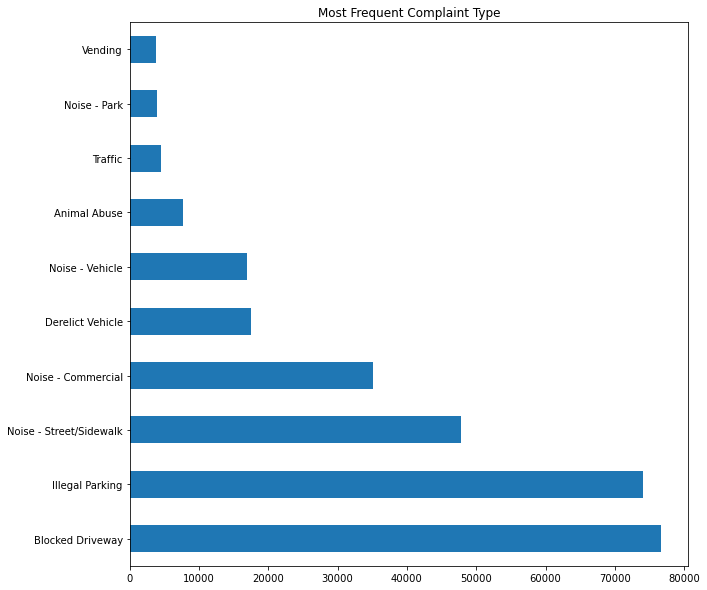

In [17]:
# MAJOR INSIGHTS - 1
# Most frequent type of complain
dataset['Complaint Type'].value_counts().head(10).plot(kind='barh',figsize=(10,10), title = ('Most Frequent Complaint Type'));

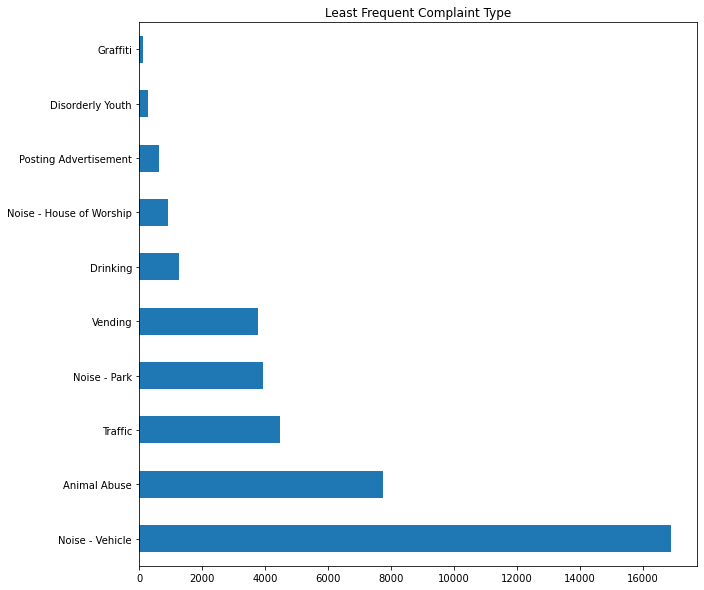

In [18]:
# MAJOR INSIGHTS - 2
# Least frequent type of complain
dataset['Complaint Type'].value_counts().tail(10).plot(kind='barh',figsize=(10,10), title = ('Least Frequent Complaint Type'));

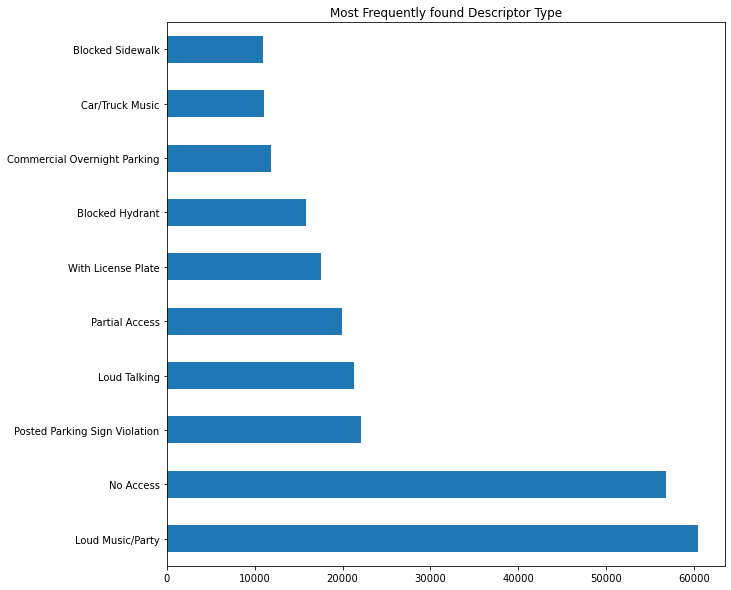

In [19]:
# MAJOR INSIGHTS - 3
# Most frequently fount descriptor
dataset['Descriptor'].value_counts().head(10).plot(kind='barh',figsize=(10,10), title = ('Most Frequently found Descriptor Type'));

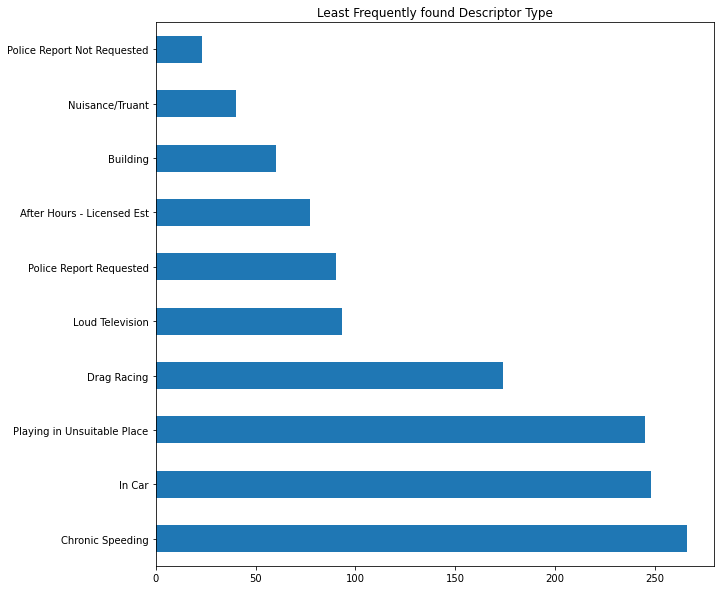

In [20]:
# MAJOR INSIGHTS - 4
# Least frequent type of complain
dataset['Descriptor'].value_counts().tail(10).plot(kind='barh',figsize=(10,10), title = ('Least Frequently found Descriptor Type'));

In [21]:
# MAJOR INSIGHTS - 5
# A Pie Chart representing maximum number of complaints filed for cities
majorComplintsCity = dataset.dropna(subset=["City"])
majorComplintsCity = dataset.groupby("City")

sortedCityType = majorComplintsCity.size().sort_values(ascending = False)
sortedCityType = sortedCityType.to_frame('count').reset_index()

sortedCityType
sortedCityType.head()

,City,count
0,Brooklyn,96881
1,New York,61940
2,Bronx,40223
3,Staten Island,12214
4,Jamaica,7155


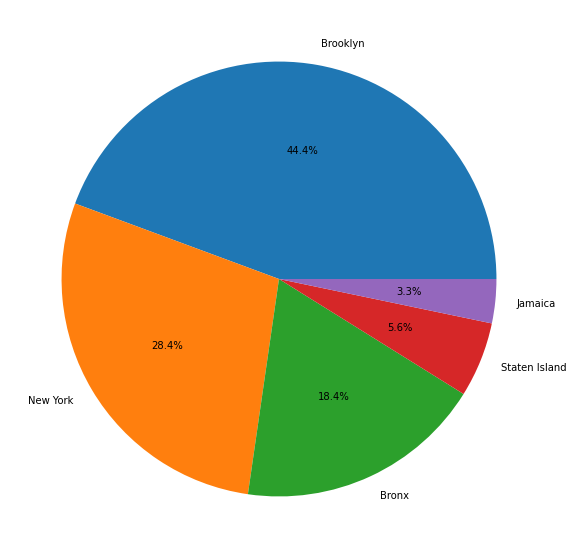

In [22]:
#MAJOR INSIGHT - 6
# Pie Chart Representation for 5 most frequently complaint registering cities
sortedCityType = sortedCityType.head()
plt.figure(figsize=(10,10))
plt.pie(sortedCityType['count'],labels=sortedCityType["City"], autopct="%1.1f%%")
plt.show()

# 4 Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [23]:
dataset['Request_Closing_Hours'] = dataset['Request_Closing_Time'].astype('timedelta64[h]')+1
dataset[['Request_Closing_Time','Request_Closing_Hours']].head()
mean = dataset['Request_Closing_Hours'].mean()
std = dataset['Request_Closing_Hours'].std()

print('Mean: ',mean)
print('Std: ',std)


Mean:  4.823075654957344
Std:  6.064308137841479


In [24]:
sort = dataset['Request_Closing_Hours'].sort_values(ascending=True)

In [25]:
req_time_grouping = dataset.groupby(['Complaint Type','Borough'])[['Request_Closing_Hours']].mean().unstack()

In [26]:
req_time_grouping

Request_Closing_Hours                                \
Borough                                  BRONX  BROOKLYN MANHATTAN    QUEENS   
Complaint Type                                                                 
Animal Abuse                          7.840057  5.343096  4.200529  5.925827   
Blocked Driveway                      6.766266  4.919404  4.062257  5.043218   
Derelict Vehicle                      9.711134  6.472421  4.784906  9.011849   
Disorderly Youth                      4.746032  4.652778  2.926471  3.796610   
Drinking                              6.329787  4.038911  3.588435  4.397759   
Graffiti                              9.333333  8.767442  5.545455  7.054054   
Illegal Parking                       7.074320  4.781229  3.896002  5.267016   
Noise - Commercial                    5.220485  3.501484  3.259326  4.289369   
Noise - House of Worship              5.037975  3.600592  2.851852  4.120401   
Noise - Park                          5.254789  3.662980  3.472151  4.365931   
Noise - Street/Sidewalk               5.745262  3.817888  3.258668  4.147802   
Noise - Vehicle                       6.081241  3.799650  3.155721  4.225844   
Posting Advertisement                 4.062500  3.911111  3.463415  5.700000   
Traffic                               5.429775  3.628466  3.181462  4.778972   
Vending                               7.339523  5.035019  3.815546  5.291405   

                                        
Borough                  STATEN ISLAND  
Complaint Type                          
Animal Abuse                  5.466786  
Blocked Driveway              4.585708  
Derelict Vehicle              5.546795  
Disorderly Youth              4.434783  
Drinking                      3.977143  
Graffiti                     10.500000  
Illegal Parking               4.362277  
Noise - Commercial            3.516987  
Noise - House of Worship      3.058824  
Noise - Park                  3.462687  
Noise - Street/Sidewalk       3.498160  
Noise - Vehicle               3.724719  
Posting Advertisement         2.071845  
Traffic                       4.025510  
Vending                       4.720000

# 5 (a) Whether the average response time across complaint types is similar or not (overall)

In [27]:
dataset['Request_Closing_Minutes'] = dataset['Request_Closing_Time'].astype('timedelta64[m]')+1

In [28]:
data = {}
for complaint in dataset['Complaint Type'].unique():
    data[complaint] = np.log(dataset[dataset['Complaint Type']==complaint]['Request_Closing_Minutes'])

In [29]:
data.keys()

dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Noise - Park', 'Graffiti', 'Disorderly Youth'])

In [30]:
[ complaint for complaint in data.keys() ]

['Noise - Street/Sidewalk',
 'Blocked Driveway',
 'Illegal Parking',
 'Derelict Vehicle',
 'Noise - Commercial',
 'Noise - House of Worship',
 'Posting Advertisement',
 'Noise - Vehicle',
 'Animal Abuse',
 'Vending',
 'Traffic',
 'Drinking',
 'Noise - Park',
 'Graffiti',
 'Disorderly Youth']

Null Hypothesis: Average response time for all the complaints type is same.

Alternate Hypothesis: Average response time for all the complaints type is not same and theres is some difference among the groups.

Below We conduct ANOVA test for top 5 type of complaints

if p < alpha(0.05) : Reject Null Hypothesis, Average response time for all the complaints type is not same.

if p > alpha(0.05) : Fail to reject Null Hypothesis, Average response time for all the complaints type is same.

In [31]:
from scipy.stats import f_oneway

stat, p = f_oneway(data['Noise - Street/Sidewalk'],data['Blocked Driveway'],data['Illegal Parking'],data['Derelict Vehicle'],
                   data['Noise - Commercial'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=2457.700, p=0.000
Different distributions (reject H0)


As our p-value is quite low , hence it is being converted to 0.0
Since our p-value is lowere that our critical p-value, we will conclude that we have enogh evidence to reject pur Null Hypothesis and that

Average response time for all the complaints type is not same.

# 5(b) Are the type of complaint or service requested and location related?

In [32]:
dataset1 = dataset[['Complaint Type', 'City']]
dataset1 = dataset1.dropna()
dataset1.shape

(291164, 2)

In [33]:
C_C = pd.crosstab(dataset1['Complaint Type'], dataset1['City'], margins=True, margins_name = 'Total')
C_C

City,Arverne,Astoria,Bayside,Bellerose,Breezy Point,Bronx,Brooklyn,Cambria Heights,Central Park,College Point,...,Saint Albans,South Ozone Park,South Richmond Hill,Springfield Gardens,Staten Island,Sunnyside,Whitestone,Woodhaven,Woodside,Total
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Animal Abuse,38,125,37,7,2,1413,2390,11,0,28,...,30,55,26,24,557,35,28,45,69,7745
Blocked Driveway,35,2734,376,95,3,12741,28128,147,0,435,...,244,942,1547,262,2141,206,208,1059,1623,76696
Derelict Vehicle,27,363,198,89,3,1949,5167,115,0,184,...,202,358,289,209,1763,10,227,308,249,17511
Disorderly Youth,2,3,1,2,0,63,72,0,0,1,...,1,2,2,0,23,2,1,0,1,285
Drinking,1,35,1,1,1,188,257,0,0,0,...,3,13,23,6,175,10,2,3,15,1271
Graffiti,1,4,3,0,0,9,43,0,0,1,...,0,0,0,0,2,1,1,0,3,113
Illegal Parking,58,1278,512,106,15,7831,27394,76,2,352,...,181,494,462,238,4883,122,525,681,989,74039
Noise - Commercial,2,1543,40,37,4,2431,11452,12,0,35,...,29,70,198,36,677,161,16,175,211,35148
Noise - House of Worship,11,19,2,1,0,79,338,2,0,0,...,1,3,3,1,17,0,0,3,3,922


In [34]:
#Chi Square test

Null Hypothesis: Complaint type is not related to Cities.
Alternate Hypothesis: Complaint type is related to Cities.

Below We conduct CHI SQUARE test for complaints

if p < alpha(0.05) : Reject Null Hypothesis, Complaint type is not related to Cities.

if p > alpha(0.05) : Fail to reject Null Hypothesis, Complaint type is related to Cities.

In [35]:
from scipy.stats import chi2_contingency

#Defining the data

stat,p,dof,expected = chi2_contingency(C_C)
print('Chi Square value : ', stat)

alpha = 0.05
print('p value is ' +str(p))

if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Chi Square value :  104694.51946928105
p value is 0.0
Different distributions (reject H0)


As our p-value is quite low , hence it is being converted to 0.0
Since our p-value is lowere that our critical p-value, we will conclude that we have enogh evidence to reject pur Null Hypothesis and that

Complaint type is related to Cities.